**Findings from the papers:**
1. Goal: to eventually test these techniques-----gradient boosting models, Neural networks,Neural Monotonic Additive Models (NMAMs)
2. Explore these techniques for feature seletion and transformation----------Principal Component Analysis (PCA), Recursive Feature Elimination (RFE), mutual information selection, and various transformations (log transformations, polynomial features, etc.)
3.  explore explainable AI (XAI) techniques for credit scoring..like SHAP (SHapley Additive Explanations), LIME (Local Interpretable Model-agnostic Explanations), and Transparent Neural Networks to make credit scoring decisions more interpretable.

In [3]:
import pandas as pd

df=pd.read_csv("/kaggle/input/copy-of-credit-score-data-from-kaggle/CreditScore_train.csv")

In [2]:
for ele in df.columns:
    print(ele)

x001
x002
x003
x004
x005
x006
x007
x008
x009
x010
x011
x012
x013
x014
x015
x016
x017
x018
x019
x020
x021
x022
x023
x024
x025
x026
x027
x028
x029
x030
x031
x032
x033
x034
x035
x036
x037
x038
x039
x040
x041
x042
x043
x044
x045
x046
x047
x048
x049
x050
x051
x052
x053
x054
x055
x056
x057
x058
x059
x060
x061
x062
x063
x064
x065
x066
x067
x068
x069
x070
x071
x072
x073
x074
x075
x076
x077
x078
x079
x080
x081
x082
x083
x084
x085
x086
x087
x088
x089
x090
x091
x092
x093
x094
x095
x096
x097
x098
x099
x100
x101
x102
x103
x104
x105
x106
x107
x108
x109
x110
x111
x112
x113
x114
x115
x116
x117
x118
x119
x120
x121
x122
x123
x124
x125
x126
x127
x128
x129
x130
x131
x132
x133
x134
x135
x136
x137
x138
x139
x140
x141
x142
x143
x144
x145
x146
x147
x148
x149
x150
x151
x152
x153
x154
x155
x156
x157
x158
x159
x160
x161
x162
x163
x164
x165
x166
x167
x168
x169
x170
x171
x172
x173
x174
x175
x176
x177
x178
x179
x180
x181
x182
x183
x184
x185
x186
x187
x188
x189
x190
x191
x192
x193
x194
x195
x196
x197
x198
x199
x200


In [3]:
df.shape

(80000, 305)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 186.2 MB


In [5]:
for col in df.columns:
    unique_types = df[col].dropna().apply(type).unique()  # Get unique data types in the column
    print(f"Column: {col}")
    print(f"Data Type (Pandas): {df[col].dtype}")
    print(f"Unique Data Types in Column: {unique_types}")
    print("-" * 50)

Column: x001
Data Type (Pandas): int64
Unique Data Types in Column: [<class 'int'>]
--------------------------------------------------
Column: x002
Data Type (Pandas): float64
Unique Data Types in Column: [<class 'float'>]
--------------------------------------------------
Column: x003
Data Type (Pandas): float64
Unique Data Types in Column: [<class 'float'>]
--------------------------------------------------
Column: x004
Data Type (Pandas): float64
Unique Data Types in Column: [<class 'float'>]
--------------------------------------------------
Column: x005
Data Type (Pandas): float64
Unique Data Types in Column: [<class 'float'>]
--------------------------------------------------
Column: x006
Data Type (Pandas): int64
Unique Data Types in Column: [<class 'int'>]
--------------------------------------------------
Column: x007
Data Type (Pandas): int64
Unique Data Types in Column: [<class 'int'>]
--------------------------------------------------
Column: x008
Data Type (Pandas): int64


In [6]:
# Print missing values for each column
for col in df.columns:
    missing_values = df[col].isnull().sum()
    print(f"Column: {col} | Missing Values: {missing_values}")


Column: x001 | Missing Values: 0
Column: x002 | Missing Values: 17185
Column: x003 | Missing Values: 17185
Column: x004 | Missing Values: 17181
Column: x005 | Missing Values: 4867
Column: x006 | Missing Values: 0
Column: x007 | Missing Values: 0
Column: x008 | Missing Values: 0
Column: x009 | Missing Values: 0
Column: x010 | Missing Values: 0
Column: x011 | Missing Values: 0
Column: x012 | Missing Values: 0
Column: x013 | Missing Values: 0
Column: x014 | Missing Values: 0
Column: x015 | Missing Values: 0
Column: x016 | Missing Values: 0
Column: x017 | Missing Values: 0
Column: x018 | Missing Values: 0
Column: x019 | Missing Values: 0
Column: x020 | Missing Values: 0
Column: x021 | Missing Values: 0
Column: x022 | Missing Values: 0
Column: x023 | Missing Values: 0
Column: x024 | Missing Values: 0
Column: x025 | Missing Values: 0
Column: x026 | Missing Values: 0
Column: x027 | Missing Values: 0
Column: x028 | Missing Values: 0
Column: x029 | Missing Values: 0
Column: x030 | Missing Value

Check the missing value type in all the columns:
1. Check if they are of MCAR type:
   We use **Little’s MCAR Test** to determine if missing data is **Missing Completely at Random (MCAR)**. This test checks whether the probability of missing values in a dataset is independent of both **observed** and **unobserved** data.

The test is based on a **chi-square test** that examines patterns of missingness across different variables. If the **p-value > 0.05**, we fail to reject the null hypothesis, indicating that the missing data is likely **MCAR** (randomly distributed). If the **p-value ≤ 0.05**, the missing data is **not MCAR**, meaning it depends on other variables.

This helps in deciding whether to use simple imputation methods (like mean/mode) or more advanced techniques (like multiple imputation or model-based approaches).

In [8]:
from scipy.stats import chi2_contingency

# Identify columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

# Perform Little's MCAR Test
def littles_mcar_test(data):
    data = data.copy()
    missing_mask = data.isnull()

    # Convert missing values to binary (1 = missing, 0 = not missing)
    missing_data_binary = missing_mask.astype(int)

    # Compute chi-square test for each missing column
    chi_square_values = []
    p_values = []

    for col in missing_cols:
        observed = pd.crosstab(missing_data_binary[col], missing_data_binary.sum(axis=1))
        chi2, p, _, _ = chi2_contingency(observed)
        chi_square_values.append(chi2)
        p_values.append(p)

    # Print results
    for i, col in enumerate(missing_cols):
        print(f"Column: {col} | Chi-Square: {chi_square_values[i]:.4f} | p-value: {p_values[i]:.4f}")
        if p_values[i] > 0.05:
            print(f"❌ {col} likely MCAR (p > 0.05)")
        else:
            print(f"✅ {col} NOT MCAR (p <= 0.05, indicates missingness depends on other variables)")
        print("-" * 50)

# Run the test
littles_mcar_test(df)

Column: x002 | Chi-Square: 76182.0850 | p-value: 0.0000
✅ x002 NOT MCAR (p <= 0.05, indicates missingness depends on other variables)
--------------------------------------------------
Column: x003 | Chi-Square: 76182.0850 | p-value: 0.0000
✅ x003 NOT MCAR (p <= 0.05, indicates missingness depends on other variables)
--------------------------------------------------
Column: x004 | Chi-Square: 76170.0215 | p-value: 0.0000
✅ x004 NOT MCAR (p <= 0.05, indicates missingness depends on other variables)
--------------------------------------------------
Column: x005 | Chi-Square: 75251.2838 | p-value: 0.0000
✅ x005 NOT MCAR (p <= 0.05, indicates missingness depends on other variables)
--------------------------------------------------
Column: x041 | Chi-Square: 58166.8713 | p-value: 0.0000
✅ x041 NOT MCAR (p <= 0.05, indicates missingness depends on other variables)
--------------------------------------------------
Column: x044 | Chi-Square: 62507.4341 | p-value: 0.0000
✅ x044 NOT MCAR (p 

In [11]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import spearmanr

# Identify columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

def test_for_mar_fixed(data, missing_cols):
    data = data.copy()
    
    for target_col in missing_cols:
        print(f"Checking if {target_col} is MAR...")

        # Create missing indicator (1 = missing, 0 = not missing)
        data["missing_indicator"] = data[target_col].isnull().astype(int)

        # Select numerical columns excluding the target column
        numerical_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col != target_col]

        # Drop rows where all selected numerical features are NaN to avoid bias
        data_subset = data[numerical_cols + ["missing_indicator"]].dropna()

        if len(data_subset) < 10:  # Ensure enough data points for statistical analysis
            print(f"⚠️ Skipping {target_col}: Not enough valid data for MAR test")
            continue

        try:
            # Logistic Regression to check dependency on other columns
            X = data_subset[numerical_cols]
            y = data_subset["missing_indicator"]
            X = sm.add_constant(X)  # Add constant for intercept

            model = sm.Logit(y, X).fit(disp=False)
            p_values = model.pvalues[1:]  # Ignore intercept

            # If any predictor variable has p < 0.05, missingness depends on it
            if (p_values < 0.05).any():
                print(f"✅ {target_col} is likely MAR (Missingness depends on other variables)")
            else:
                print(f"❌ {target_col} is NOT MAR (No strong evidence of dependency on other variables)")
        
        except Exception as e:
            print(f"⚠️ Logistic Regression failed for {target_col}, using correlation test instead.")
            
            # Use Spearman correlation as a backup test
            for num_col in numerical_cols:
                non_na_data = data[[num_col, "missing_indicator"]].dropna()
                if len(non_na_data) < 10:  # Ensure enough data for correlation test
                    continue

                corr, p_value = spearmanr(non_na_data[num_col], non_na_data["missing_indicator"])
                if p_value < 0.05:
                    print(f"✅ {target_col} is likely MAR (Spearman correlation found dependency with {num_col})")
                    break
            else:
                print(f"❌ {target_col} is NOT MAR (No strong correlation with other variables)")

        print("-" * 50)

# Run the improved MAR test
test_for_mar_fixed(df, missing_cols)


Checking if x002 is MAR...
⚠️ Logistic Regression failed for x002, using correlation test instead.
✅ x002 is likely MAR (Spearman correlation found dependency with x001)
--------------------------------------------------
Checking if x003 is MAR...
⚠️ Logistic Regression failed for x003, using correlation test instead.
✅ x003 is likely MAR (Spearman correlation found dependency with x001)
--------------------------------------------------
Checking if x004 is MAR...
⚠️ Logistic Regression failed for x004, using correlation test instead.
✅ x004 is likely MAR (Spearman correlation found dependency with x001)
--------------------------------------------------
Checking if x005 is MAR...
⚠️ Logistic Regression failed for x005, using correlation test instead.
✅ x005 is likely MAR (Spearman correlation found dependency with x001)
--------------------------------------------------
Checking if x041 is MAR...
⚠️ Logistic Regression failed for x041, using correlation test instead.
✅ x041 is likely 

In [16]:
# Identify columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

# Function to test for MAR using the chi-square test
def test_for_mar(data, missing_cols):
    data = data.copy()
    results = {}

    for target_col in missing_cols:
        # Create a binary indicator for missing values (1 = missing, 0 = not missing)
        data["missing_indicator"] = data[target_col].isnull().astype(int)

        # Ensure at least some missing and non-missing values exist
        if data["missing_indicator"].nunique() < 2:
            results[target_col] = "❌ Not enough missing/non-missing values to test."
            continue

        # Select numerical columns excluding the target column and without missing values
        numerical_cols = [col for col in data.select_dtypes(include=[np.number]).columns 
                          if col != target_col and data[col].notnull().sum() > 0]

        found_dependency = False  # Flag to check if we find any dependency

        for col in numerical_cols:
            # Skip columns with too few unique values
            if data[col].nunique() < 4:
                continue

            # Discretize the numerical column into bins (to make it categorical)
            try:
                data[col + "_binned"] = pd.qcut(data[col], q=4, duplicates="drop")
            except ValueError:
                continue

            # Create a contingency table
            contingency_table = pd.crosstab(data["missing_indicator"], data[col + "_binned"])

            # Ensure contingency table has enough categories
            if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
                continue

            # Perform the chi-square test
            _, p_value, _, _ = chi2_contingency(contingency_table)

            # Check if there is a significant dependency
            if p_value < 0.05:
                found_dependency = True
                break  # Stop checking once a dependency is found

        # Store the result
        results[target_col] = "✅ MAR Detected" if found_dependency else "❌ No strong evidence for MAR"

    # Print final results
    for col, result in results.items():
        print(f"{col}: {result}")

# Run the MAR test
test_for_mar(df, missing_cols)


x002: ✅ MAR Detected
x003: ✅ MAR Detected
x004: ✅ MAR Detected
x005: ✅ MAR Detected
x041: ✅ MAR Detected
x044: ✅ MAR Detected
x045: ✅ MAR Detected
x057: ✅ MAR Detected
x058: ✅ MAR Detected
x098: ✅ MAR Detected
x148: ✅ MAR Detected
x155: ✅ MAR Detected
x162: ✅ MAR Detected
x222: ✅ MAR Detected
x223: ✅ MAR Detected
x234: ✅ MAR Detected
x235: ✅ MAR Detected
x237: ✅ MAR Detected
x238: ✅ MAR Detected
x239: ✅ MAR Detected
x242: ✅ MAR Detected
x253: ✅ MAR Detected
x255: ✅ MAR Detected
x256: ✅ MAR Detected
x257: ✅ MAR Detected
x259: ✅ MAR Detected
x265: ✅ MAR Detected
x266: ✅ MAR Detected
x267: ✅ MAR Detected
x268: ✅ MAR Detected
x272: ✅ MAR Detected
x275: ✅ MAR Detected
x287: ✅ MAR Detected
x288: ✅ MAR Detected
x289: ✅ MAR Detected
x290: ✅ MAR Detected
x293: ✅ MAR Detected
x295: ✅ MAR Detected
x297: ✅ MAR Detected
x302: ✅ MAR Detected
x304: ✅ MAR Detected


In [13]:
from scipy.stats import ks_2samp, ttest_ind

# Identify columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

# Function to check MNAR
def test_for_mnar(data, missing_cols):
    data = data.copy()
    
    for target_col in missing_cols:
        print(f"Checking if {target_col} is MNAR...")

        # Get observed (non-missing) and missing groups
        observed_values = data[target_col].dropna()
        missing_values = data[target_col][data[target_col].isnull()]

        # Check if there are enough values to perform the test
        if len(observed_values) < 10 or len(missing_values) < 10:
            print(f"⚠️ Not enough data to test MNAR for {target_col} (requires at least 10 missing & observed values)")
            print("-" * 50)
            continue

        # Kolmogorov-Smirnov test to compare distributions
        ks_stat, ks_p = ks_2samp(observed_values, np.random.choice(observed_values, len(missing_values), replace=True))

        # T-test (to compare means)
        t_stat, t_p = ttest_ind(observed_values, np.random.choice(observed_values, len(missing_values), replace=True), equal_var=False)

        # Check if there is a significant difference
        if ks_p < 0.05 or t_p < 0.05:
            print(f"⚠️ {target_col} is likely MNAR (p-value KS-test={ks_p:.4f}, T-test={t_p:.4f})")
        else:
            print(f"✅ {target_col} is NOT MNAR (p-value KS-test={ks_p:.4f}, T-test={t_p:.4f})")

        print("-" * 50)

# Run the MNAR test
test_for_mnar(df, missing_cols)


Checking if x002 is MNAR...
✅ x002 is NOT MNAR (p-value KS-test=0.7832, T-test=0.2379)
--------------------------------------------------
Checking if x003 is MNAR...
✅ x003 is NOT MNAR (p-value KS-test=0.6456, T-test=0.4078)
--------------------------------------------------
Checking if x004 is MNAR...
✅ x004 is NOT MNAR (p-value KS-test=0.9390, T-test=0.3388)
--------------------------------------------------
Checking if x005 is MNAR...
✅ x005 is NOT MNAR (p-value KS-test=0.6826, T-test=0.8067)
--------------------------------------------------
Checking if x041 is MNAR...
✅ x041 is NOT MNAR (p-value KS-test=0.4142, T-test=0.3063)
--------------------------------------------------
Checking if x044 is MNAR...
✅ x044 is NOT MNAR (p-value KS-test=1.0000, T-test=0.8760)
--------------------------------------------------
Checking if x045 is MNAR...
⚠️ x045 is likely MNAR (p-value KS-test=0.9331, T-test=0.0287)
--------------------------------------------------
Checking if x057 is MNAR...
✅ 

Because of high number of mising value percentage in almost all columns we chose MICE instead of PMM 

In [4]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Identify numerical columns **that have missing values**
missing_cols = [col for col in df.select_dtypes(include=[np.number]).columns if df[col].isnull().sum() > 0]

# Create a copy of the original DataFrame
imputed_mice = df.copy()

# Initialize MICE Imputer (default uses Bayesian Ridge Regression)
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply MICE only to the numerical columns with missing values and store in new dataframe
imputed_mice[missing_cols] = mice_imputer.fit_transform(df[missing_cols])

# Print confirmation
print("✅ Missing values imputed using MICE and stored in 'imputed_mice' DataFrame")


✅ Missing values imputed using MICE and stored in 'imputed_mice' DataFrame


[IterativeImputer] Early stopping criterion not reached.


In [18]:
# Define the target variable (replace 'target_column' with actual column name)
target_col = 'y' 

# Ensure target column is numeric
if target_col in df.select_dtypes(include=[np.number]).columns:
    # Compute percentiles from 1% to 100%
    percentiles = np.percentile(df[target_col].dropna(), np.arange(1, 101))

    # Print each percentile
    for i, value in enumerate(percentiles, start=1):
        print(f"{i}th Percentile: {value:.4f}")
else:
    print(f"❌ The target column '{target_col}' is not numeric.")


1th Percentile: 390.0000
2th Percentile: 416.0000
3th Percentile: 432.0000
4th Percentile: 443.0000
5th Percentile: 453.0000
6th Percentile: 461.0000
7th Percentile: 468.0000
8th Percentile: 475.0000
9th Percentile: 480.0000
10th Percentile: 485.0000
11th Percentile: 489.0000
12th Percentile: 493.0000
13th Percentile: 496.0000
14th Percentile: 499.0000
15th Percentile: 502.0000
16th Percentile: 504.0000
17th Percentile: 507.0000
18th Percentile: 508.0000
19th Percentile: 511.0000
20th Percentile: 512.0000
21th Percentile: 515.0000
22th Percentile: 517.0000
23th Percentile: 518.0000
24th Percentile: 521.0000
25th Percentile: 524.0000
26th Percentile: 524.0000
27th Percentile: 524.0000
28th Percentile: 527.0000
29th Percentile: 530.0000
30th Percentile: 534.0000
31th Percentile: 536.0000
32th Percentile: 540.0000
33th Percentile: 543.0000
34th Percentile: 546.0000
35th Percentile: 549.0000
36th Percentile: 552.0000
37th Percentile: 553.0000
38th Percentile: 556.0000
39th Percentile: 560.

In [19]:
# Define the target variable (replace 'target_column' with actual column name)
target_col = 'y'  

# Ensure target column is numeric
if target_col in df.select_dtypes(include=[np.number]).columns:
    # Drop NaN values from target column
    target_values = df[target_col].dropna().values
    
    # Compute percentiles from 1% to 100%
    percentiles = np.percentile(target_values, np.arange(1, 101))

    # Count values in each percentile range
    counts = []
    for i in range(len(percentiles) - 1):
        lower, upper = percentiles[i], percentiles[i + 1]
        count = ((target_values >= lower) & (target_values < upper)).sum()
        counts.append(count)
        print(f"Values between {i+1}th and {i+2}th Percentile ({lower:.4f} - {upper:.4f}): {count}")

    # Print the last percentile range (100th percentile)
    last_count = (target_values >= percentiles[-1]).sum()
    print(f"Values >= {percentiles[-1]:.4f} (100th Percentile): {last_count}")

else:
    print(f"❌ The target column '{target_col}' is not numeric.")


Values between 1th and 2th Percentile (390.0000 - 416.0000): 787
Values between 2th and 3th Percentile (416.0000 - 432.0000): 814
Values between 3th and 4th Percentile (432.0000 - 443.0000): 759
Values between 4th and 5th Percentile (443.0000 - 453.0000): 840
Values between 5th and 6th Percentile (453.0000 - 461.0000): 753
Values between 6th and 7th Percentile (461.0000 - 468.0000): 812
Values between 7th and 8th Percentile (468.0000 - 475.0000): 831
Values between 8th and 9th Percentile (475.0000 - 480.0000): 773
Values between 9th and 10th Percentile (480.0000 - 485.0000): 779
Values between 10th and 11th Percentile (485.0000 - 489.0000): 777
Values between 11th and 12th Percentile (489.0000 - 493.0000): 883
Values between 12th and 13th Percentile (493.0000 - 496.0000): 660
Values between 13th and 14th Percentile (496.0000 - 499.0000): 769
Values between 14th and 15th Percentile (499.0000 - 502.0000): 928
Values between 15th and 16th Percentile (502.0000 - 504.0000): 652
Values betwe

As of now not removing any outliers since there isnt any significant number of them and it shouldnt be affecting the model training due to the vastness of data.

In [5]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set a random seed for reproducibility
SEED = 42
np.random.seed(SEED)

In [6]:
test_df=pd.read_csv('/kaggle/input/copy-of-credit-score-data-from-kaggle/CreditScore_test.csv')
test_imputed_mice= test_df.copy()
test_imputed_mice[missing_cols]= mice_imputer.transform(test_df[missing_cols])

X_train = imputed_mice.drop(columns=["y"])  
y_train = imputed_mice["y"]

X_val= test_imputed_mice.drop(columns=["y"]) 
Y_val = test_imputed_mice["y"]


print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")


Training Data Shape: (80000, 304)
Validation Data Shape: (20000, 304)


In [7]:
params = {
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Trees
    'objective': 'regression',  # Predicting continuous credit score
    'metric': ['mae', 'rmse', 'r2'],  # Mean Absolute Error, RMSE, R²
    'num_leaves': 128,  # Controls model complexity
    'max_depth': -1,  # No depth limit for learning flexibility
    'learning_rate': 0.005,  # Small learning rate for stability
    'n_estimators': 10000,  # Large estimators for better convergence
    'min_child_samples': 20,  # Minimum samples in each leaf
    'subsample': 0.7,  # Row sampling for regularization
    'colsample_bytree': 0.6,  # Feature sampling per tree
    'feature_fraction': 0.6,  # Reduces overfitting
    'bagging_fraction': 0.7,  # Row sampling
    'bagging_freq': 5,  # Bagging every 5 iterations
    'lambda_l1': 0.2,  # L1 Regularization (Lasso)
    'lambda_l2': 1.2,  # L2 Regularization (Ridge)
    'early_stopping_rounds': 100,  # Stops when no improvement
    'verbosity': -1,  # Suppress logs
    'random_state': SEED,  # For reproducibility
}


In [12]:
# Convert datasets into LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=Y_val)

# Train the model with updated logging
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.log_evaluation(100)]  # Replaces verbose_eval
)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 66.2647	training's rmse: 78.0547	valid_1's l1: 66.7759	valid_1's rmse: 78.5804
[200]	training's l1: 45.6646	training's rmse: 54.5543	valid_1's l1: 46.2383	valid_1's rmse: 55.1848
[300]	training's l1: 33.7656	training's rmse: 41.2306	valid_1's l1: 34.416	valid_1's rmse: 42.0416
[400]	training's l1: 27.0186	training's rmse: 33.9816	valid_1's l1: 27.7574	valid_1's rmse: 35.0315
[500]	training's l1: 23.1351	training's rmse: 30.0349	valid_1's l1: 23.9704	valid_1's rmse: 31.336
[600]	training's l1: 20.8507	training's rmse: 27.8031	valid_1's l1: 21.8077	valid_1's rmse: 29.3435
[700]	training's l1: 19.4563	training's rmse: 26.4221	valid_1's l1: 20.5434	valid_1's rmse: 28.2034
[800]	training's l1: 18.5709	training's rmse: 25.4944	valid_1's l1: 19.7967	valid_1's rmse: 27.5143
[900]	training's l1: 17.9547	training's rmse: 24.7982	valid_1's l1: 19.3157	valid_1's rmse: 27.0456
[1000]	training's l1: 17.4853	training's rmse: 24.233	valid_1's l1: 18.9842	valid_1's rmse: 26.7034
[1

In [13]:
# Predict credit scores
y_pred = model.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(Y_val, y_pred)
rmse = mean_squared_error(Y_val, y_pred, squared=False)
r2 = r2_score(Y_val, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 16.7559
Root Mean Squared Error (RMSE): 24.2547
R² Score: 0.9584


In [8]:
from sklearn.feature_selection import RFE
base_lgb = lgb.LGBMRegressor(n_estimators=500, random_state=SEED)

# Apply RFE (Recursive Feature Elimination)
num_features_to_select = 100  # Selecting top 30 features
rfe = RFE(estimator=base_lgb, n_features_to_select=num_features_to_select, step=5)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

print(f"Selected {len(selected_features)} features: {list(selected_features)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23879
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 299
[LightGBM] [Info] Start training from score 619.397762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23852
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 297
[LightGBM] [Info] Start training from score 619.397762
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [9]:
# Transform datasets to only include selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

In [10]:
params = {
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Trees
    'objective': 'regression',  # Predicting continuous credit score
    'metric': ['mae', 'rmse', 'r2'],  # Mean Absolute Error, RMSE, R²
    'num_leaves': 128,  
    'max_depth': -1,  
    'learning_rate': 0.005,  
    'n_estimators': 10000,  
    'min_child_samples': 20,  
    'subsample': 0.7,  
    'colsample_bytree': 0.6,  
    'feature_fraction': 0.6,  
    'bagging_fraction': 0.7,  
    'bagging_freq': 5,  
    'lambda_l1': 0.2,  
    'lambda_l2': 1.2,  
    'early_stopping_rounds': 100,  
    'verbosity': -1,  
    'random_state': SEED,  
}

# Convert datasets into LightGBM format
train_data = lgb.Dataset(X_train_selected, label=y_train)
val_data = lgb.Dataset(X_val_selected, label=Y_val)

# Train the model with updated logging
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.log_evaluation(100)]  # Replaces verbose_eval
)

### -------------------- STEP 4: Model Evaluation --------------------
# Make predictions
y_pred = model.predict(X_val_selected)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 66.3464	training's rmse: 78.1582	valid_1's l1: 66.8676	valid_1's rmse: 78.6915
[200]	training's l1: 45.7398	training's rmse: 54.6619	valid_1's l1: 46.3282	valid_1's rmse: 55.3126
[300]	training's l1: 33.8783	training's rmse: 41.3908	valid_1's l1: 34.5482	valid_1's rmse: 42.2333
[400]	training's l1: 27.1513	training's rmse: 34.1686	valid_1's l1: 27.9004	valid_1's rmse: 35.25
[500]	training's l1: 23.2709	training's rmse: 30.2299	valid_1's l1: 24.1194	valid_1's rmse: 31.5601
[600]	training's l1: 21.0153	training's rmse: 28.0222	valid_1's l1: 21.9921	valid_1's rmse: 29.5948
[700]	training's l1: 19.6594	training's rmse: 26.6737	valid_1's l1: 20.7794	valid_1's rmse: 28.4916
[800]	training's l1: 18.7864	training's rmse: 25.7485	valid_1's l1: 20.0528	valid_1's rmse: 27.8022
[900]	training's l1: 18.1796	training's rmse: 25.0595	valid_1's l1: 19.5828	valid_1's rmse: 27.3355
[1000]	training's l1: 17.7168	training's rmse: 24.497	valid_1's l1: 19.2515	valid_1's rmse: 26.9935
[1

NameError: name 'y_val' is not defined

In [11]:
# Calculate metrics
mae = mean_absolute_error(Y_val, y_pred)
rmse = np.sqrt(mean_squared_error(Y_val, y_pred))
r2 = r2_score(Y_val, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

MAE: 17.1429, RMSE: 24.6641, R² Score: 0.9570


In [7]:
target_col = 'y'  # Replace with actual target column

# Ensure only numerical features are considered
numerical_cols = imputed_mice.select_dtypes(include=['number']).columns

# Compute Pearson correlation of all numerical features with the target
correlation_matrix = imputed_mice[numerical_cols].corr()

# Extract correlation values with the target variable
correlation_with_target = correlation_matrix[target_col]

# Filter for strictly positive correlations
positive_correlation_features = correlation_with_target[correlation_with_target > 0]

# Ensure all rows are printed by setting Pandas display options
pd.set_option('display.max_rows', None)  # No row limit for printing

# Display features with strictly positive correlation
print("Features with strict positive correlation to the target:")
print(positive_correlation_features.sort_values(ascending=False))

Features with strict positive correlation to the target:
y       1.000000
x235    0.606632
x236    0.571419
x022    0.568507
x005    0.561765
x227    0.536365
x249    0.513269
x226    0.512186
x228    0.511395
x046    0.504893
x244    0.503260
x225    0.485964
x025    0.485231
x023    0.479607
x014    0.472186
x245    0.468700
x237    0.467818
x246    0.460134
x002    0.456446
x247    0.446793
x250    0.445246
x262    0.443585
x229    0.442550
x261    0.436900
x260    0.433129
x224    0.429922
x030    0.426534
x027    0.426141
x020    0.415614
x028    0.412992
x019    0.411619
x018    0.409353
x239    0.395311
x043    0.392063
x248    0.381429
x004    0.377319
x251    0.375307
x015    0.309319
x047    0.305579
x017    0.303187
x042    0.297639
x282    0.297065
x283    0.286920
x098    0.277565
x284    0.272008
x281    0.270083
x021    0.242028
x279    0.241753
x258    0.241309
x292    0.233451
x273    0.232838
x044    0.227198
x029    0.215034
x026    0.214605
x048    0.196311
x016    

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# # Load your training and testing datasets
# train_data = pd.read_csv("train.csv")  # Replace with your actual train file
# test_data = pd.read_csv("test.csv")  # Replace with your actual test file

# Assume the target column is 'credit_score' (modify as needed)
target_col = 'y'
X_train = imputed_mice.drop(columns=[target_col]).values
y_train = imputed_mice[target_col].values
X_test = test_imputed_mice.drop(columns=[target_col]).values
y_test = test_imputed_mice[target_col].values

# ✅ Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# ✅ Define Monotonic Features
monotonic_features = ['x235', 'x236']
feature_names = list(imputed_mice.drop(columns=['y']).columns)
monotonic_indices = [i for i, feature in enumerate(feature_names) if feature in monotonic_features]
non_monotonic_indices = [i for i in range(len(feature_names)) if i not in monotonic_indices]

# ✅ Monotonic Linear Layer with Softplus
class MonotonicLinear(nn.Module):
    def __init__(self):
        super(MonotonicLinear, self).__init__()
        self.weight = nn.Parameter(torch.abs(torch.randn(1)) + 0.01)  # Positive impact
        self.bias = nn.Parameter(torch.relu(torch.randn(1)))  # Non-negative bias

    def forward(self, x):
        return self.weight * torch.nn.functional.softplus(x) + self.bias  # Softplus ensures monotonicity

# ✅ NMAM Model with Stability Fixes
class NMAM(nn.Module):
    def __init__(self, input_dim, monotonic_indices):
        super(NMAM, self).__init__()

        # Monotonic Layers
        self.monotonic_layers = nn.ModuleList([MonotonicLinear() for _ in monotonic_indices])
        
        # Non-Monotonic Layers (With Batch Normalization & Dropout)
        if len(non_monotonic_indices) > 0:
            self.non_monotonic_layer = nn.Sequential(
                nn.Linear(len(non_monotonic_indices), 24),  # Reduce neurons
                nn.BatchNorm1d(24),  # Stabilize gradients
                nn.ReLU(),
                nn.Dropout(0.3),  # Higher dropout
                nn.Linear(24, 12),
                nn.BatchNorm1d(12),
                nn.ReLU(),
                nn.Linear(12, 6),
                nn.ReLU()
            )
        else:
            self.non_monotonic_layer = None  

        # Output Layer
        self.output_layer = nn.Linear(6 + len(monotonic_indices), 1)

    def forward(self, x):
        # Process Monotonic Features
        monotonic_outputs = [self.monotonic_layers[i](x[:, idx].view(-1, 1)) for i, idx in enumerate(monotonic_indices)]
        
        # Process Non-Monotonic Features
        if self.non_monotonic_layer:
            non_monotonic_output = self.non_monotonic_layer(x[:, non_monotonic_indices])
        else:
            non_monotonic_output = torch.zeros(x.shape[0], 6)  

        # Combine Monotonic & Non-Monotonic Outputs
        monotonic_concat = torch.cat(monotonic_outputs, dim=1) if monotonic_outputs else torch.zeros(x.shape[0], 0)
        final_input = torch.cat([monotonic_concat, non_monotonic_output], dim=1)
        
        return self.output_layer(final_input)

# ✅ Initialize Model
model = NMAM(input_dim=X_train.shape[1], monotonic_indices=monotonic_indices)

# ✅ Use AdamW Optimizer with Cosine Decay Learning Rate
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)  # Gradually reduces lr

# ✅ Use Huber Loss (Better for Outliers)
criterion = nn.SmoothL1Loss()

# ✅ Mini-batch Training for Stability
batch_size = 64
num_epochs = 200

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ✅ Training Loop with Gradient Clipping & Scheduler
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Higher limit to handle strong gradients
        optimizer.step()
        
        epoch_loss += loss.item()
    
    scheduler.step()  # Reduce learning rate dynamically

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Avg Loss: {epoch_loss / len(train_loader):.4f}")

# ✅ Evaluation
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")

Epoch [0/200], Avg Loss: 192.7512
Epoch [50/200], Avg Loss: 38.2802
Epoch [100/200], Avg Loss: 35.2240
Epoch [150/200], Avg Loss: 33.0897
Test Loss: 31.9768


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ✅ Ensure model is in evaluation mode
model.eval()

# ✅ Get predictions on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# ✅ Convert to NumPy arrays for metric calculations
y_pred_test_np = y_pred_test.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

# ✅ Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_np, y_pred_test_np)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# ✅ Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_test_np))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# ✅ Compute R² Score (Coefficient of Determination)
r2 = r2_score(y_test_np, y_pred_test_np)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 32.4728
Root Mean Squared Error (RMSE): 43.7233
R² Score: 0.8647


In [10]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Define 4 alternative parameter sets for tuning
param_sets = {
    "Set 1: Aggressive Regularization": {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': ['mae', 'rmse', 'r2'],
        'num_leaves': 64,  # Reduce complexity
        'max_depth': 12,
        'learning_rate': 0.005,
        'n_estimators': 7000,  # Reduce to avoid overfitting
        'min_child_samples': 25,  # Slightly higher
        'subsample': 0.65,
        'colsample_bytree': 0.5,  # Less features per tree
        'feature_fraction': 0.5,
        'bagging_fraction': 0.7,
        'bagging_freq': 5,
        'lambda_l1': 0.5,  # Stronger L1 regularization
        'lambda_l2': 2.0,  # Stronger L2 regularization
        'early_stopping_rounds': 100,
        'verbosity': -1,
        'random_state': 42
    },
    "Set 2: Balanced Model Complexity": {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': ['mae', 'rmse', 'r2'],
        'num_leaves': 96,
        'max_depth': -1,
        'learning_rate': 0.007,
        'n_estimators': 8000,
        'min_child_samples': 30,  # Increases leaf stability
        'subsample': 0.75,
        'colsample_bytree': 0.6,
        'feature_fraction': 0.6,
        'bagging_fraction': 0.75,
        'bagging_freq': 5,
        'lambda_l1': 0.3,
        'lambda_l2': 1.5,
        'early_stopping_rounds': 100,
        'verbosity': -1,
        'random_state': 42
    },
    "Set 3: Feature-Specific Optimization": {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': ['mae', 'rmse', 'r2'],
        'num_leaves': 128,
        'max_depth': -1,
        'learning_rate': 0.006,
        'n_estimators': 9000,
        'min_child_samples': 20,
        'subsample': 0.7,
        'colsample_bytree': 0.75,  # Increase to use more features
        'feature_fraction': 0.75,
        'bagging_fraction': 0.75,
        'bagging_freq': 4,
        'lambda_l1': 0.2,
        'lambda_l2': 1.2,
        'early_stopping_rounds': 100,
        'verbosity': -1,
        'random_state': 42
    },
    "Set 4: Faster Convergence": {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': ['mae', 'rmse', 'r2'],
        'num_leaves': 80,
        'max_depth': 10,
        'learning_rate': 0.01,  # Increase learning rate
        'n_estimators': 5000,  # Reduce estimators for faster training
        'min_child_samples': 20,
        'subsample': 0.7,
        'colsample_bytree': 0.65,
        'feature_fraction': 0.6,
        'bagging_fraction': 0.7,
        'bagging_freq': 5,
        'lambda_l1': 0.25,
        'lambda_l2': 1.0,
        'early_stopping_rounds': 100,
        'verbosity': -1,
        'random_state': 42
    }
}

# ✅ Function to Train and Evaluate LightGBM Models
def evaluate_lgbm(params, X_train, y_train, X_val, y_val):
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
        callbacks=[lgb.log_evaluation(100)]  # Log every 100 iterations
    )

    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    return mae, rmse, r2

# ✅ Run Evaluation for Each Parameter Set
results = {}
for name, params in param_sets.items():
    print(f"🔹 Training with {name}...")
    mae, rmse, r2 = evaluate_lgbm(params, X_train, y_train, X_val, Y_val)
    results[name] = (mae, rmse, r2)

# ✅ Print Results for Each Parameter Set
print("\n🔹 **Final Comparison of LightGBM Parameter Sets**")
for name, (mae, rmse, r2) in results.items():
    print(f"\n**{name}**")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# ✅ Select Best Model Based on MAE
best_model = min(results, key=lambda x: results[x][0])
print(f"\n🚀 Best Parameter Set Based on MAE: **{best_model}**")


🔹 Training with Set 1: Aggressive Regularization...


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 67.1638	training's rmse: 79.1994	valid_1's l1: 67.5911	valid_1's rmse: 79.6334
[200]	training's l1: 47.0074	training's rmse: 56.286	valid_1's l1: 47.3922	valid_1's rmse: 56.6775
[300]	training's l1: 35.3811	training's rmse: 43.3283	valid_1's l1: 35.7497	valid_1's rmse: 43.7447
[400]	training's l1: 28.7404	training's rmse: 36.2138	valid_1's l1: 29.1241	valid_1's rmse: 36.7112
[500]	training's l1: 24.8722	training's rmse: 32.2752	valid_1's l1: 25.2653	valid_1's rmse: 32.8669
[600]	training's l1: 22.5388	training's rmse: 29.9945	valid_1's l1: 22.9766	valid_1's rmse: 30.6922
[700]	training's l1: 21.1259	training's rmse: 28.6118	valid_1's l1: 21.6018	valid_1's rmse: 29.4175
[800]	training's l1: 20.226	training's rmse: 27.691	valid_1's l1: 20.7659	valid_1's rmse: 28.6158
[900]	training's l1: 19.6155	training's rmse: 27.0313	valid_1's l1: 20.222	valid_1's rmse: 28.0724
[1000]	training's l1: 19.164	training's rmse: 26.5137	valid_1's l1: 19.8337	valid_1's rmse: 27.6665
[110

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 57.0649	training's rmse: 67.5763	valid_1's l1: 57.5288	valid_1's rmse: 68.0657
[200]	training's l1: 36.2332	training's rmse: 44.0813	valid_1's l1: 36.7279	valid_1's rmse: 44.6638
[300]	training's l1: 26.7492	training's rmse: 33.9079	valid_1's l1: 27.3146	valid_1's rmse: 34.728
[400]	training's l1: 22.3326	training's rmse: 29.4987	valid_1's l1: 22.9923	valid_1's rmse: 30.5617
[500]	training's l1: 20.1677	training's rmse: 27.394	valid_1's l1: 20.9614	valid_1's rmse: 28.713
[600]	training's l1: 19.0182	training's rmse: 26.1999	valid_1's l1: 19.9521	valid_1's rmse: 27.766
[700]	training's l1: 18.2946	training's rmse: 25.3654	valid_1's l1: 19.3726	valid_1's rmse: 27.1781
[800]	training's l1: 17.7747	training's rmse: 24.7226	valid_1's l1: 18.9977	valid_1's rmse: 26.7753
[900]	training's l1: 17.3693	training's rmse: 24.1915	valid_1's l1: 18.7311	valid_1's rmse: 26.4755
[1000]	training's l1: 17.022	training's rmse: 23.72	valid_1's l1: 18.5266	valid_1's rmse: 26.2367
[1100]

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 61.1496	training's rmse: 72.1875	valid_1's l1: 61.6551	valid_1's rmse: 72.726
[200]	training's l1: 40.0569	training's rmse: 48.2404	valid_1's l1: 40.6435	valid_1's rmse: 48.9228
[300]	training's l1: 29.2795	training's rmse: 36.386	valid_1's l1: 29.9923	valid_1's rmse: 37.3439
[400]	training's l1: 23.7527	training's rmse: 30.6833	valid_1's l1: 24.5856	valid_1's rmse: 31.9533
[500]	training's l1: 20.8507	training's rmse: 27.8351	valid_1's l1: 21.838	valid_1's rmse: 29.4034
[600]	training's l1: 19.2541	training's rmse: 26.2413	valid_1's l1: 20.4096	valid_1's rmse: 28.1201
[700]	training's l1: 18.3031	training's rmse: 25.214	valid_1's l1: 19.6219	valid_1's rmse: 27.3884
[800]	training's l1: 17.6588	training's rmse: 24.4507	valid_1's l1: 19.1473	valid_1's rmse: 26.9116
[900]	training's l1: 17.1695	training's rmse: 23.8316	valid_1's l1: 18.8269	valid_1's rmse: 26.5694
[1000]	training's l1: 16.7721	training's rmse: 23.3033	valid_1's l1: 18.5978	valid_1's rmse: 26.3085
[11

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[100]	training's l1: 46.4356	training's rmse: 55.5457	valid_1's l1: 46.8703	valid_1's rmse: 56.0023
[200]	training's l1: 28.0968	training's rmse: 35.4122	valid_1's l1: 28.5742	valid_1's rmse: 36.0683
[300]	training's l1: 21.9643	training's rmse: 29.2878	valid_1's l1: 22.5506	valid_1's rmse: 30.232
[400]	training's l1: 19.7194	training's rmse: 27.0484	valid_1's l1: 20.4639	valid_1's rmse: 28.2913
[500]	training's l1: 18.6815	training's rmse: 25.8717	valid_1's l1: 19.5933	valid_1's rmse: 27.4097
[600]	training's l1: 18.039	training's rmse: 25.0642	valid_1's l1: 19.1269	valid_1's rmse: 26.8966
[700]	training's l1: 17.5651	training's rmse: 24.4327	valid_1's l1: 18.8258	valid_1's rmse: 26.5384
[800]	training's l1: 17.172	training's rmse: 23.8989	valid_1's l1: 18.604	valid_1's rmse: 26.2683
[900]	training's l1: 16.8331	training's rmse: 23.4306	valid_1's l1: 18.429	valid_1's rmse: 26.0632
[1000]	training's l1: 16.5456	training's rmse: 23.0258	valid_1's l1: 18.2964	valid_1's rmse: 25.9055
[110

Found `n_estimators` in params. Will use it instead of argument


[100]	training's l1: 66.2647	training's rmse: 78.0548	valid_1's l1: 66.7749	valid_1's rmse: 78.5795
[200]	training's l1: 45.6633	training's rmse: 54.5541	valid_1's l1: 46.2394	valid_1's rmse: 55.1877
[300]	training's l1: 33.7644	training's rmse: 41.2278	valid_1's l1: 34.4132	valid_1's rmse: 42.0364
[400]	training's l1: 27.0176	training's rmse: 33.9807	valid_1's l1: 27.752	valid_1's rmse: 35.0257
[500]	training's l1: 23.1325	training's rmse: 30.0319	valid_1's l1: 23.9651	valid_1's rmse: 31.3265
[600]	training's l1: 20.8475	training's rmse: 27.8007	valid_1's l1: 21.8002	valid_1's rmse: 29.3305
[700]	training's l1: 19.4561	training's rmse: 26.4229	valid_1's l1: 20.5359	valid_1's rmse: 28.1906
[800]	training's l1: 18.5675	training's rmse: 25.4934	valid_1's l1: 19.7871	valid_1's rmse: 27.4981
[900]	training's l1: 17.9499	training's rmse: 24.7969	valid_1's l1: 19.3082	valid_1's rmse: 27.0328
[1000]	training's l1: 17.4811	training's rmse: 24.2324	valid_1's l1: 18.9778	valid_1's rmse: 26.695
[

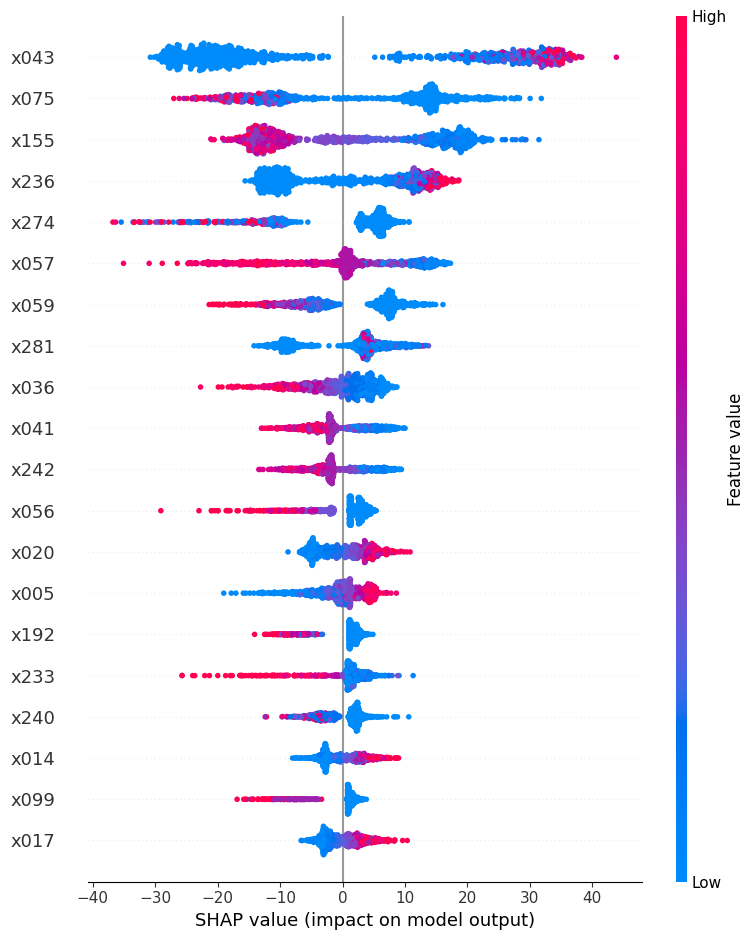

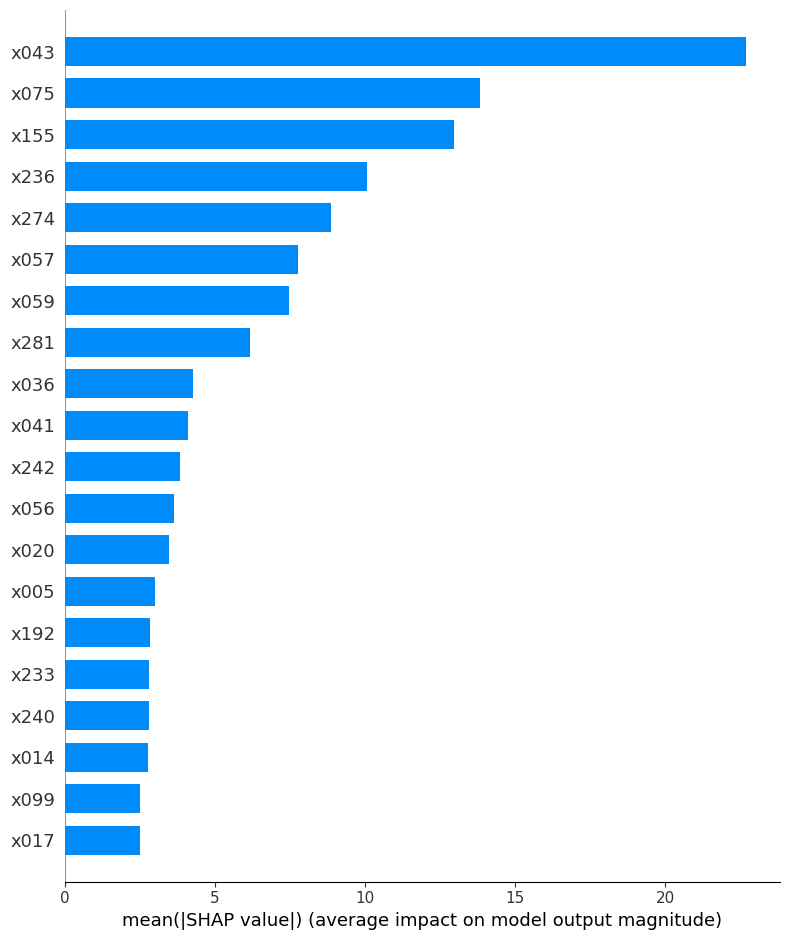

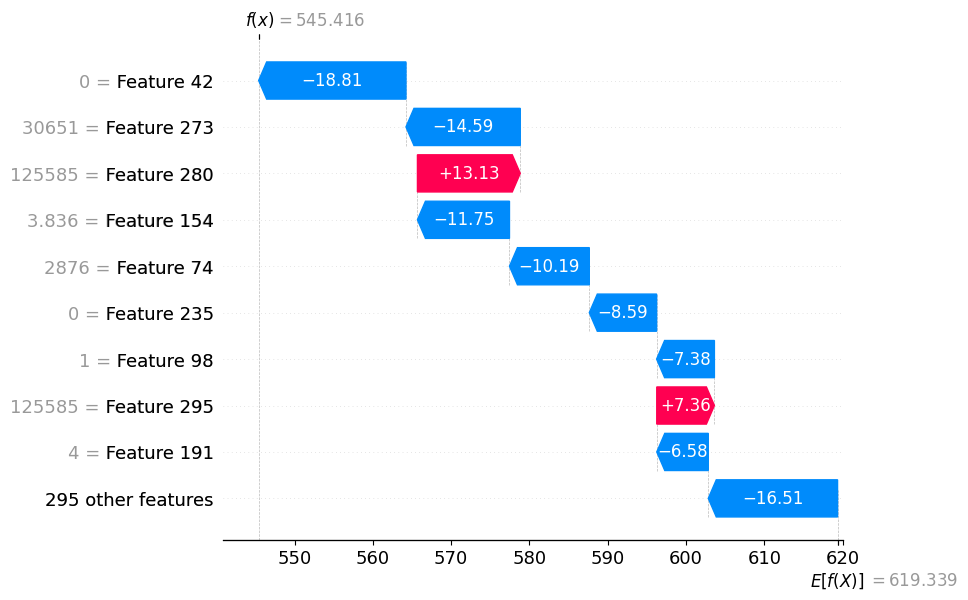


🔹 **SHAP Analysis Complete! (Optimized)**


In [8]:
import lightgbm as lgb
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Best-performing LightGBM Parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mae', 'rmse', 'r2'],
    'num_leaves': 128,
    'max_depth': -1,
    'learning_rate': 0.005,
    'n_estimators': 10000,
    'min_child_samples': 20,
    'subsample': 0.7,
    'colsample_bytree': 0.6,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 1.2,
    'early_stopping_rounds': 100,
    'verbosity': -1,
    'random_state': 42
}

# ✅ Load & Prepare Data (Assuming Data is Already Cleaned & Numerical)
X_train = imputed_mice.drop(columns=['y']).values
y_train = imputed_mice['y'].values
X_val = test_imputed_mice.drop(columns=['y']).values
y_val = test_imputed_mice['y'].values

feature_names = list(imputed_mice.drop(columns=['y']).columns)  # ['x001', 'x002', ..., 'x305']

# ✅ Convert Data to LightGBM Format
train_data = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
val_data = lgb.Dataset(X_val, label=y_val, feature_name=feature_names)

# ✅ Train the Model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.log_evaluation(100)]  # Log every 100 rounds
)

# ✅ Make Predictions
y_pred = model.predict(X_val)

# ✅ Compute Evaluation Metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# ✅ Print Results
print("\n🔹 **LightGBM Performance Metrics**")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

print("\n🔹 **Computing SHAP Values for Interpretation (Optimized)**")

# ✅ Use TreeSHAP instead of KernelSHAP
explainer = shap.TreeExplainer(model)

# ✅ Reduce number of validation samples
X_val_sample = X_val[:1000]  # Take only the first 1000 rows

# ✅ Compute SHAP values only for a subset
shap_values = explainer(X_val_sample)

# ✅ SHAP Feature Importance Plot (Fast)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names)
plt.show()

# ✅ SHAP Bar Plot for Global Feature Importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names, plot_type="bar")
plt.show()

# ✅ Waterfall Plot for a Random Instance (Faster than force_plot)
sample_index = np.random.randint(0, len(X_val_sample))
shap.waterfall_plot(shap_values[sample_index])

print("\n🔹 **SHAP Analysis Complete! (Optimized)**")

# # ✅ SHAP EXPLAINABILITY
# print("\n🔹 **Computing SHAP Values for Interpretation**")

# # ✅ Initialize SHAP Explainer
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer(X_val)

# # ✅ SHAP Feature Importance Plot
# plt.figure(figsize=(10, 6))
# shap.summary_plot(shap_values, X_val, feature_names=feature_names)
# plt.show()

# # ✅ SHAP Bar Plot for Global Feature Importance
# plt.figure(figsize=(10, 6))
# shap.summary_plot(shap_values, X_val, feature_names=feature_names, plot_type="bar")
# plt.show()

# # ✅ Force Plot for a Random Instance (Single Prediction Explanation)
# sample_index = np.random.randint(0, len(X_val))  # Pick a random example
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[sample_index, :], feature_names=feature_names)

# # ✅ Waterfall Plot for a Random Instance
# shap.waterfall_plot(shap_values[sample_index])

# print("\n🔹 **SHAP Analysis Complete!**")


In [1]:
print("\n🔹 **Computing SHAP Values for Interpretation (Optimized)**")

# ✅ Use TreeSHAP instead of KernelSHAP
explainer = shap.TreeExplainer(model)

# ✅ Reduce number of validation samples
X_val_sample = X_val[:1000]  # Take only the first 1000 rows

# ✅ Compute SHAP values only for a subset
shap_values = explainer(X_val_sample)

# ✅ SHAP Feature Importance Plot (Fast)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names)
plt.show()

# ✅ SHAP Bar Plot for Global Feature Importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_sample, feature_names=feature_names, plot_type="bar")
plt.show()

# ✅ Waterfall Plot for a Random Instance (Faster than force_plot)
sample_index = np.random.randint(0, len(X_val_sample))
shap.waterfall_plot(shap_values[sample_index])

print("\n🔹 **SHAP Analysis Complete! (Optimized)**")



🔹 **Computing SHAP Values for Interpretation (Optimized)**


NameError: name 'shap' is not defined

In [15]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import sklearn

print("LightGBM Version:", lgb.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Scikit-learn Version:", sklearn.__version__)


LightGBM Version: 4.5.0
NumPy Version: 1.26.4
Pandas Version: 2.2.3
Scikit-learn Version: 1.2.2
